<a href="https://colab.research.google.com/github/adrianoaandrade/adrianoaandrade/blob/main/NASA_MDP_Confiabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


NASA MDP SOFTWARE RELIABILITY ANALYSIS
CM1 Dataset - Spacecraft Instrument (498 modules)

ESTATÍSTICAS DESCRITIVAS DO NASA CM1 DATASET

Total de Módulos Analisados: 14
Total de Defeitos Encontrados: 4
Módulos com Defeitos: 4
Taxa de Módulos Defeituosos: 28.57%

--- Métricas de Complexidade ---
Complexidade Ciclomática Média: 15.43
Complexidade Ciclomática Máxima: 70
Complexidade Essencial Média: 4.71
Complexidade de Design Média: 9.14

--- Métricas de Código ---
LOC Média: 89.64
LOC Total: 1255
Densidade de Defeitos Média: 2.10 defeitos/KLOC

--- Métricas de Confiabilidade ---
MTBF (Mean Time Between Failures): 842 horas
MTTR (Mean Time To Repair): 2.1 horas
Disponibilidade: 99.75%
Taxa de Falha: 0.00119 falhas/hora

ANÁLISE DE CORRELAÇÃO: COMPLEXIDADE vs DEFEITOS

Correlação Complexidade Ciclomática - Defeitos: 0.6484
Correlação Complexidade Essencial - Defeitos: 0.5380
Correlação Complexidade de Design - Defeitos: 0.7083
Correlação LOC - Defeitos: 0.7199

Teste de Spearman (Complexi

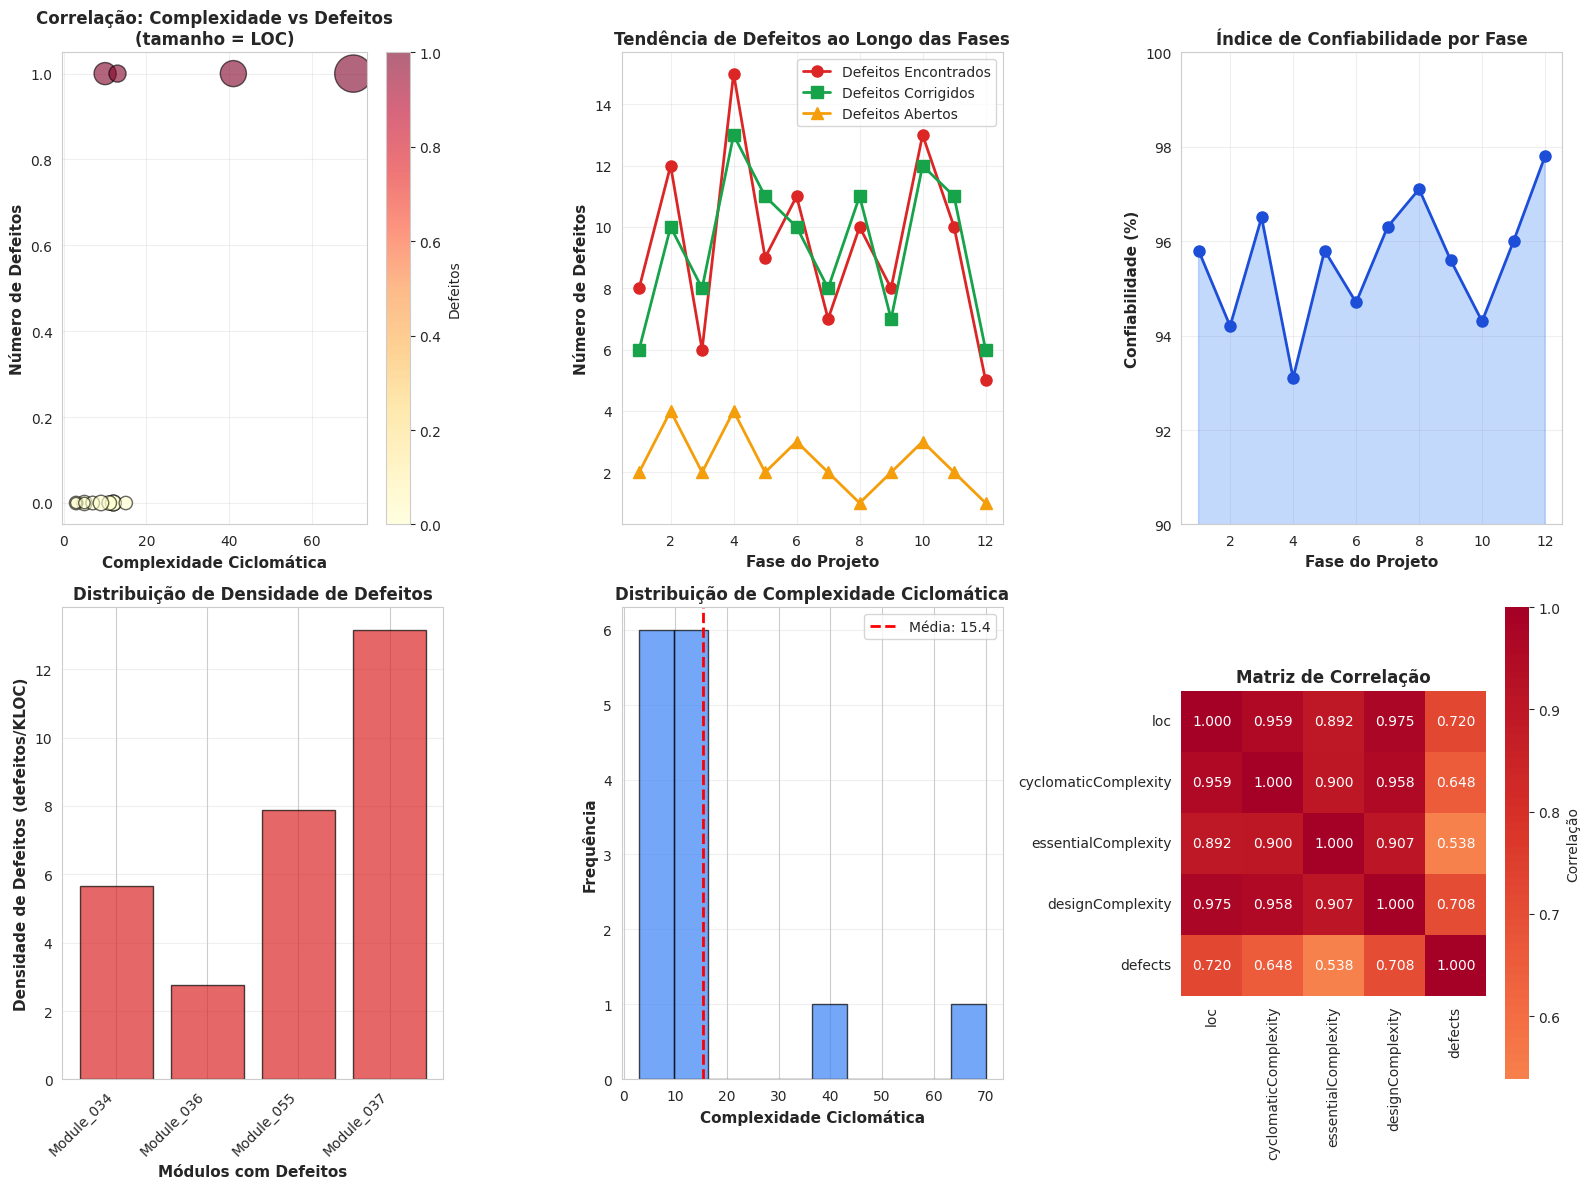


✓ Dados exportados para:
  - nasa_cm1_defect_data.csv
  - nasa_cm1_timeseries_data.csv

ANÁLISE CONCLUÍDA COM SUCESSO!



In [1]:
"""
NASA MDP Dataset - Software Reliability Analysis
Based on CM1 dataset (NASA Spacecraft Instrument)
Source: https://figshare.com/collections/NASA_MDP_Software_Defects_Data_Sets/4054940/1
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Real data from NASA CM1 Dataset
defect_data = [
    {"module": "Module_034", "loc": 177, "cyclomaticComplexity": 41, "essentialComplexity": 6, "designComplexity": 23, "defects": 1, "defectDensity": 5.65},
    {"module": "Module_036", "loc": 361, "cyclomaticComplexity": 70, "essentialComplexity": 27, "designComplexity": 46, "defects": 1, "defectDensity": 2.77},
    {"module": "Module_055", "loc": 127, "cyclomaticComplexity": 10, "essentialComplexity": 1, "designComplexity": 10, "defects": 1, "defectDensity": 7.87},
    {"module": "Module_037", "loc": 76, "cyclomaticComplexity": 13, "essentialComplexity": 7, "designComplexity": 10, "defects": 1, "defectDensity": 13.16},
    {"module": "Module_033", "loc": 65, "cyclomaticComplexity": 12, "essentialComplexity": 1, "designComplexity": 1, "defects": 0, "defectDensity": 0},
    {"module": "Module_050", "loc": 65, "cyclomaticComplexity": 12, "essentialComplexity": 3, "designComplexity": 8, "defects": 0, "defectDensity": 0},
    {"module": "Module_078", "loc": 60, "cyclomaticComplexity": 5, "essentialComplexity": 1, "designComplexity": 5, "defects": 0, "defectDensity": 0},
    {"module": "Module_072", "loc": 55, "cyclomaticComplexity": 11, "essentialComplexity": 5, "designComplexity": 8, "defects": 0, "defectDensity": 0},
    {"module": "Module_054", "loc": 48, "cyclomaticComplexity": 7, "essentialComplexity": 1, "designComplexity": 7, "defects": 0, "defectDensity": 0},
    {"module": "Module_073", "loc": 47, "cyclomaticComplexity": 3, "essentialComplexity": 1, "designComplexity": 1, "defects": 0, "defectDensity": 0},
    {"module": "Module_012", "loc": 46, "cyclomaticComplexity": 15, "essentialComplexity": 3, "designComplexity": 1, "defects": 0, "defectDensity": 0},
    {"module": "Module_049", "loc": 62, "cyclomaticComplexity": 9, "essentialComplexity": 4, "designComplexity": 6, "defects": 0, "defectDensity": 0},
    {"module": "Module_075", "loc": 32, "cyclomaticComplexity": 3, "essentialComplexity": 1, "designComplexity": 1, "defects": 0, "defectDensity": 0},
    {"module": "Module_013", "loc": 34, "cyclomaticComplexity": 5, "essentialComplexity": 5, "designComplexity": 1, "defects": 0, "defectDensity": 0},
]

time_series_data = [
    {"phase": "Phase 1", "defectsFound": 8, "defectsFixed": 6, "openDefects": 2, "reliability": 95.8},
    {"phase": "Phase 2", "defectsFound": 12, "defectsFixed": 10, "openDefects": 4, "reliability": 94.2},
    {"phase": "Phase 3", "defectsFound": 6, "defectsFixed": 8, "openDefects": 2, "reliability": 96.5},
    {"phase": "Phase 4", "defectsFound": 15, "defectsFixed": 13, "openDefects": 4, "reliability": 93.1},
    {"phase": "Phase 5", "defectsFound": 9, "defectsFixed": 11, "openDefects": 2, "reliability": 95.8},
    {"phase": "Phase 6", "defectsFound": 11, "defectsFixed": 10, "openDefects": 3, "reliability": 94.7},
    {"phase": "Phase 7", "defectsFound": 7, "defectsFixed": 8, "openDefects": 2, "reliability": 96.3},
    {"phase": "Phase 8", "defectsFound": 10, "defectsFixed": 11, "openDefects": 1, "reliability": 97.1},
    {"phase": "Phase 9", "defectsFound": 8, "defectsFixed": 7, "openDefects": 2, "reliability": 95.6},
    {"phase": "Phase 10", "defectsFound": 13, "defectsFixed": 12, "openDefects": 3, "reliability": 94.3},
    {"phase": "Phase 11", "defectsFound": 10, "defectsFixed": 11, "openDefects": 2, "reliability": 96.0},
    {"phase": "Phase 12", "defectsFound": 5, "defectsFixed": 6, "openDefects": 1, "reliability": 97.8},
]

# Reliability metrics
reliability_metrics = {
    "mtbf": 842,  # Mean Time Between Failures (hours)
    "mttr": 2.1,  # Mean Time To Repair (hours)
    "availability": 99.75,  # percentage
    "failureRate": 0.00119,  # failures per hour
}


def calculate_statistics(df):
    """Calculate descriptive statistics for the dataset"""
    print("\n" + "="*60)
    print("ESTATÍSTICAS DESCRITIVAS DO NASA CM1 DATASET")
    print("="*60)

    print(f"\nTotal de Módulos Analisados: {len(df)}")
    print(f"Total de Defeitos Encontrados: {df['defects'].sum()}")
    print(f"Módulos com Defeitos: {(df['defects'] > 0).sum()}")
    print(f"Taxa de Módulos Defeituosos: {(df['defects'] > 0).sum() / len(df) * 100:.2f}%")

    print("\n--- Métricas de Complexidade ---")
    print(f"Complexidade Ciclomática Média: {df['cyclomaticComplexity'].mean():.2f}")
    print(f"Complexidade Ciclomática Máxima: {df['cyclomaticComplexity'].max()}")
    print(f"Complexidade Essencial Média: {df['essentialComplexity'].mean():.2f}")
    print(f"Complexidade de Design Média: {df['designComplexity'].mean():.2f}")

    print("\n--- Métricas de Código ---")
    print(f"LOC Média: {df['loc'].mean():.2f}")
    print(f"LOC Total: {df['loc'].sum()}")
    print(f"Densidade de Defeitos Média: {df['defectDensity'].mean():.2f} defeitos/KLOC")

    print("\n--- Métricas de Confiabilidade ---")
    print(f"MTBF (Mean Time Between Failures): {reliability_metrics['mtbf']} horas")
    print(f"MTTR (Mean Time To Repair): {reliability_metrics['mttr']} horas")
    print(f"Disponibilidade: {reliability_metrics['availability']}%")
    print(f"Taxa de Falha: {reliability_metrics['failureRate']:.5f} falhas/hora")


def analyze_correlation(df):
    """Analyze correlation between complexity and defects"""
    print("\n" + "="*60)
    print("ANÁLISE DE CORRELAÇÃO: COMPLEXIDADE vs DEFEITOS")
    print("="*60)

    # Calculate correlation coefficients
    corr_cyclomatic = df['cyclomaticComplexity'].corr(df['defects'])
    corr_essential = df['essentialComplexity'].corr(df['defects'])
    corr_design = df['designComplexity'].corr(df['defects'])
    corr_loc = df['loc'].corr(df['defects'])

    print(f"\nCorrelação Complexidade Ciclomática - Defeitos: {corr_cyclomatic:.4f}")
    print(f"Correlação Complexidade Essencial - Defeitos: {corr_essential:.4f}")
    print(f"Correlação Complexidade de Design - Defeitos: {corr_design:.4f}")
    print(f"Correlação LOC - Defeitos: {corr_loc:.4f}")

    # Perform statistical tests
    cyclo_stat, cyclo_p = stats.spearmanr(df['cyclomaticComplexity'], df['defects'])
    print(f"\nTeste de Spearman (Complexidade Ciclomática):")
    print(f"  Coeficiente: {cyclo_stat:.4f}")
    print(f"  P-value: {cyclo_p:.4f}")
    print(f"  Significância: {'Sim' if cyclo_p < 0.05 else 'Não'} (p < 0.05)")


def severity_classification(defect_density):
    """Classify severity based on defect density"""
    if defect_density == 0:
        return "Baixa"
    elif defect_density < 5:
        return "Média"
    else:
        return "Alta"


def generate_defect_table(df):
    """Generate detailed defect analysis table"""
    print("\n" + "="*60)
    print("ANÁLISE DETALHADA POR MÓDULO")
    print("="*60)

    df['severity'] = df['defectDensity'].apply(severity_classification)

    print("\n{:<15} {:>8} {:>10} {:>10} {:>10} {:>12}".format(
        "Módulo", "LOC", "Compl.", "Defeitos", "Dens.", "Severidade"
    ))
    print("-" * 75)

    for _, row in df.iterrows():
        print("{:<15} {:>8} {:>10} {:>10} {:>10.2f} {:>12}".format(
            row['module'],
            row['loc'],
            row['cyclomaticComplexity'],
            row['defects'],
            row['defectDensity'],
            row['severity']
        ))


def plot_visualizations(df, ts_df):
    """Generate all visualizations"""

    # Create figure with subplots
    fig = plt.figure(figsize=(16, 12))

    # 1. Complexity vs Defects Scatter Plot
    ax1 = plt.subplot(2, 3, 1)
    scatter = ax1.scatter(df['cyclomaticComplexity'], df['defects'],
                         s=df['loc']*2, alpha=0.6, c=df['defects'],
                         cmap='YlOrRd', edgecolors='black', linewidth=1)
    ax1.set_xlabel('Complexidade Ciclomática', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Número de Defeitos', fontsize=11, fontweight='bold')
    ax1.set_title('Correlação: Complexidade vs Defeitos\n(tamanho = LOC)',
                  fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1, label='Defeitos')

    # 2. Time Series - Defects Trend
    ax2 = plt.subplot(2, 3, 2)
    phases = range(1, len(ts_df) + 1)
    ax2.plot(phases, ts_df['defectsFound'], marker='o', label='Defeitos Encontrados',
             linewidth=2, markersize=8, color='#dc2626')
    ax2.plot(phases, ts_df['defectsFixed'], marker='s', label='Defeitos Corrigidos',
             linewidth=2, markersize=8, color='#16a34a')
    ax2.plot(phases, ts_df['openDefects'], marker='^', label='Defeitos Abertos',
             linewidth=2, markersize=8, color='#f59e0b')
    ax2.set_xlabel('Fase do Projeto', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Número de Defeitos', fontsize=11, fontweight='bold')
    ax2.set_title('Tendência de Defeitos ao Longo das Fases',
                  fontsize=12, fontweight='bold')
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)

    # 3. Reliability Over Time
    ax3 = plt.subplot(2, 3, 3)
    ax3.fill_between(phases, ts_df['reliability'], alpha=0.3, color='#3b82f6')
    ax3.plot(phases, ts_df['reliability'], marker='o', linewidth=2,
             markersize=8, color='#1d4ed8')
    ax3.set_xlabel('Fase do Projeto', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Confiabilidade (%)', fontsize=11, fontweight='bold')
    ax3.set_title('Índice de Confiabilidade por Fase',
                  fontsize=12, fontweight='bold')
    ax3.set_ylim([90, 100])
    ax3.grid(True, alpha=0.3)

    # 4. Defect Density Distribution
    ax4 = plt.subplot(2, 3, 4)
    defect_modules = df[df['defects'] > 0]
    ax4.bar(range(len(defect_modules)), defect_modules['defectDensity'],
            color='#dc2626', alpha=0.7, edgecolor='black')
    ax4.set_xlabel('Módulos com Defeitos', fontsize=11, fontweight='bold')
    ax4.set_ylabel('Densidade de Defeitos (defeitos/KLOC)',
                   fontsize=11, fontweight='bold')
    ax4.set_title('Distribuição de Densidade de Defeitos',
                  fontsize=12, fontweight='bold')
    ax4.set_xticks(range(len(defect_modules)))
    ax4.set_xticklabels(defect_modules['module'], rotation=45, ha='right')
    ax4.grid(True, alpha=0.3, axis='y')

    # 5. Complexity Distribution
    ax5 = plt.subplot(2, 3, 5)
    ax5.hist(df['cyclomaticComplexity'], bins=10, color='#3b82f6',
             alpha=0.7, edgecolor='black')
    ax5.axvline(df['cyclomaticComplexity'].mean(), color='red',
                linestyle='--', linewidth=2, label=f'Média: {df["cyclomaticComplexity"].mean():.1f}')
    ax5.set_xlabel('Complexidade Ciclomática', fontsize=11, fontweight='bold')
    ax5.set_ylabel('Frequência', fontsize=11, fontweight='bold')
    ax5.set_title('Distribuição de Complexidade Ciclomática',
                  fontsize=12, fontweight='bold')
    ax5.legend()
    ax5.grid(True, alpha=0.3, axis='y')

    # 6. Correlation Heatmap
    ax6 = plt.subplot(2, 3, 6)
    corr_matrix = df[['loc', 'cyclomaticComplexity', 'essentialComplexity',
                      'designComplexity', 'defects']].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn_r',
                center=0, square=True, ax=ax6, cbar_kws={'label': 'Correlação'})
    ax6.set_title('Matriz de Correlação', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.savefig('nasa_cm1_analysis.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualizações salvas em: nasa_cm1_analysis.png")
    plt.show()


def main():
    """Main analysis function"""
    print("\n" + "="*60)
    print("NASA MDP SOFTWARE RELIABILITY ANALYSIS")
    print("CM1 Dataset - Spacecraft Instrument (498 modules)")
    print("="*60)

    # Create DataFrames
    df = pd.DataFrame(defect_data)
    ts_df = pd.DataFrame(time_series_data)

    # Perform analyses
    calculate_statistics(df)
    analyze_correlation(df)
    generate_defect_table(df)

    # Generate visualizations
    print("\n" + "="*60)
    print("GERANDO VISUALIZAÇÕES...")
    print("="*60)
    plot_visualizations(df, ts_df)

    # Export to CSV
    df.to_csv('nasa_cm1_defect_data.csv', index=False)
    ts_df.to_csv('nasa_cm1_timeseries_data.csv', index=False)
    print("\n✓ Dados exportados para:")
    print("  - nasa_cm1_defect_data.csv")
    print("  - nasa_cm1_timeseries_data.csv")

    print("\n" + "="*60)
    print("ANÁLISE CONCLUÍDA COM SUCESSO!")
    print("="*60 + "\n")


if __name__ == "__main__":
    main()
